In [1]:
# import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Read Dataset

In [4]:
data= pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checkin missing vale
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#no missing value

In [7]:
# remove casual and registerd because cnt is terget variable and those are not fetures of the dtatset
#remove instant because it is a serial number

data = data.drop(columns=['instant', 'casual', 'registered'],errors='ignore')


In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [10]:
# scatter plot corresponding numerical field vrs cnt

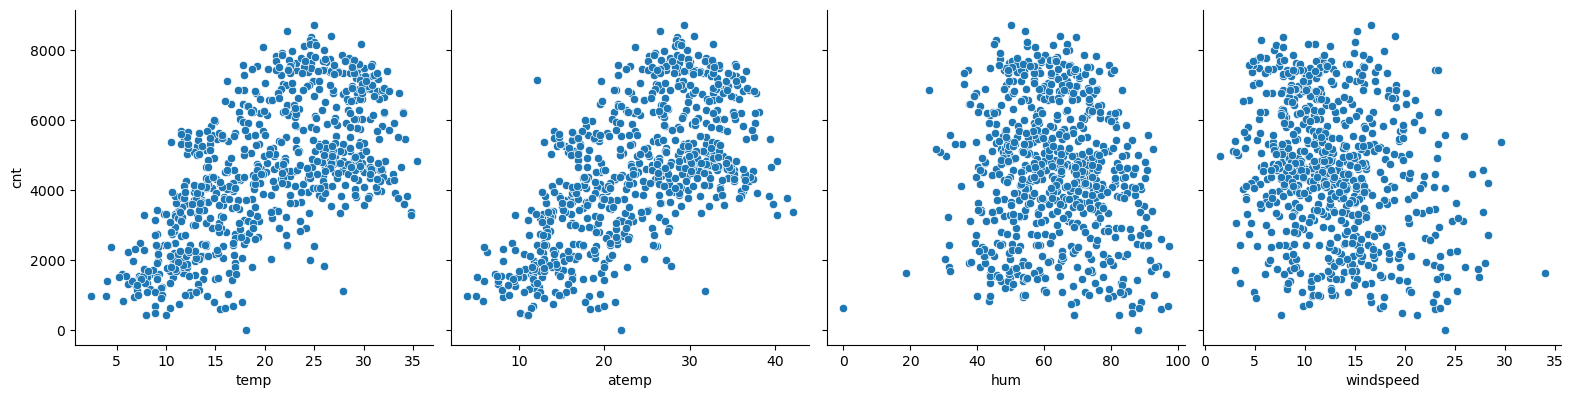

In [11]:
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=4,aspect=1);

In [12]:
#regplot with numerical fields

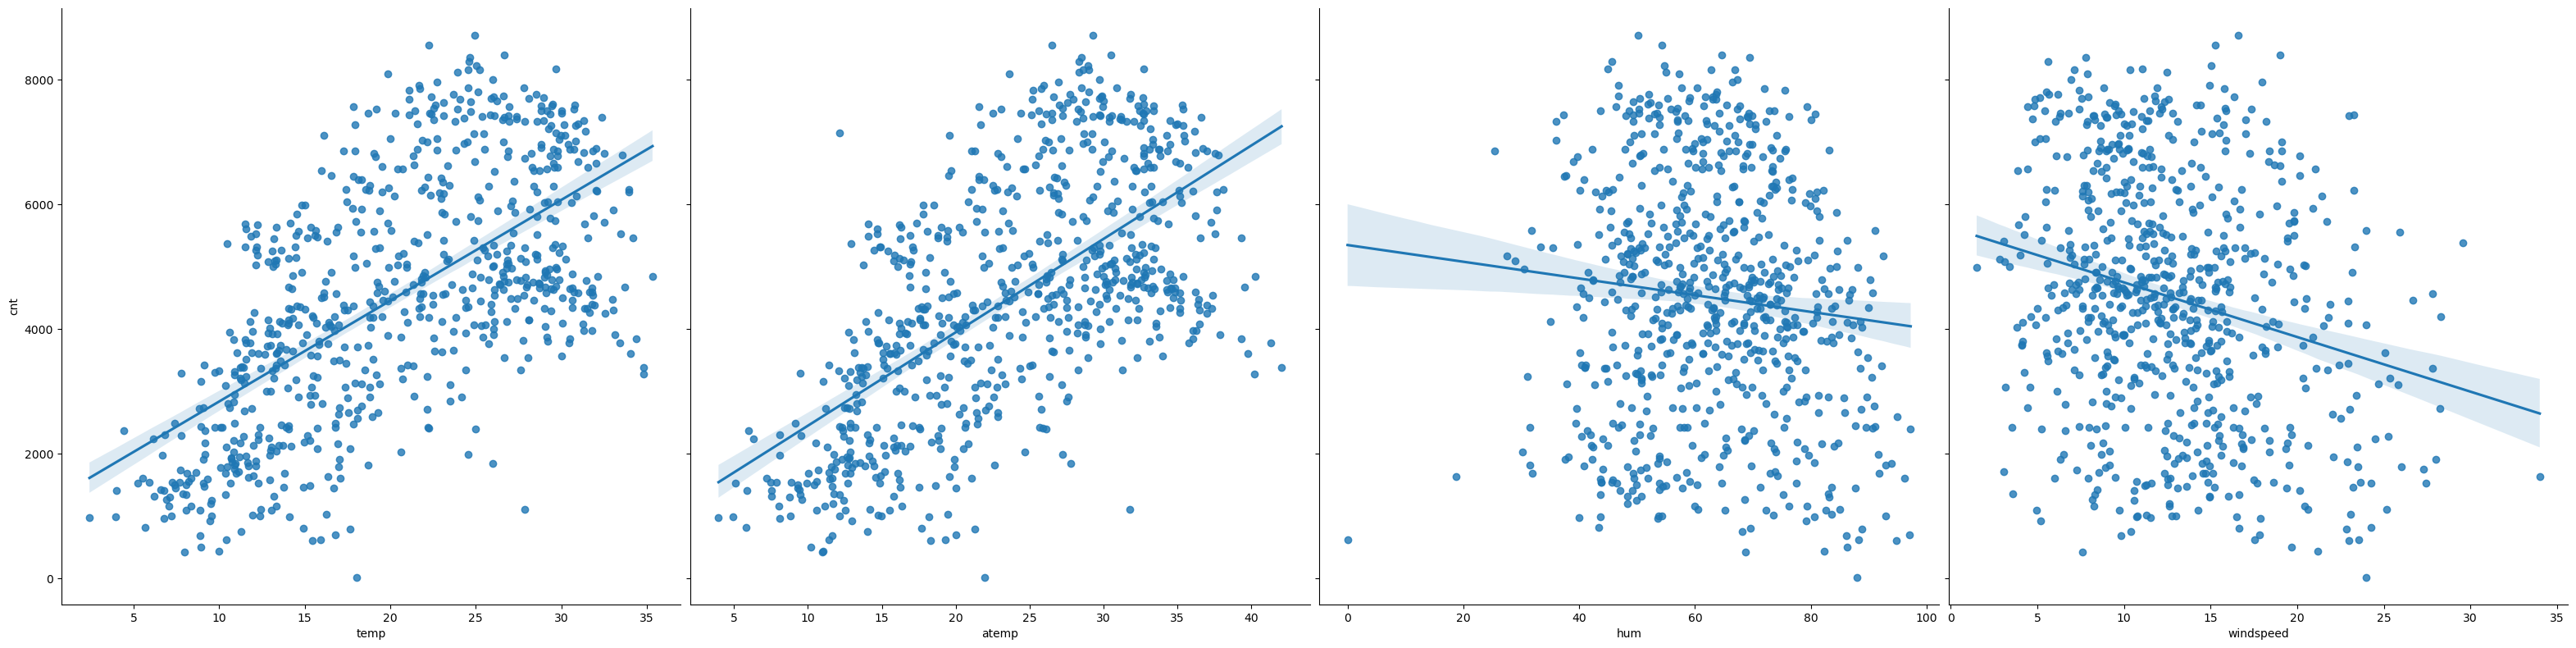

In [13]:
sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='reg',height=8,aspect=1)
plt.show()

<Axes: >

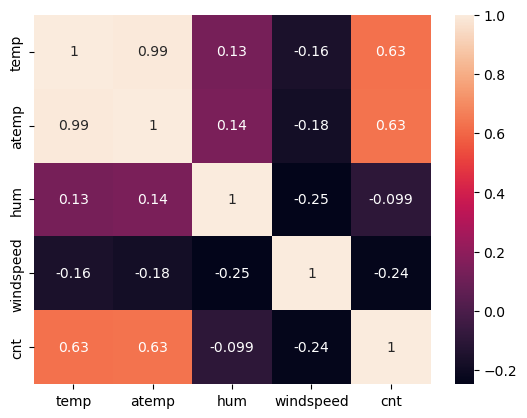

In [14]:
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)

In [15]:
#we can take any one of temp and atemp as corr is allmost one. we can drop atemp. as we can use temp and calcuate adjusted temperature from it.

In [16]:
data = data.drop(columns=['atemp'],errors='ignore')

In [17]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [18]:
#Map all catagorical column like season,weekday, month and weathersit

In [19]:
# Define the mapping
season_mapping = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_mapping = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_mapping = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_mapping = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# Replace numbers with labels

data['season'] = data['season'].replace(season_mapping)
data['mnth'] = data['mnth'].replace(mnth_mapping)
data['weekday'] = data['weekday'].replace(weekday_mapping)
data['weathersit'] = data['weathersit'].replace(weathersit_mapping)

In [20]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [21]:
# drop dteady as it is redundent column
data = data.drop(columns=['dteday'],errors='ignore')

In [22]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


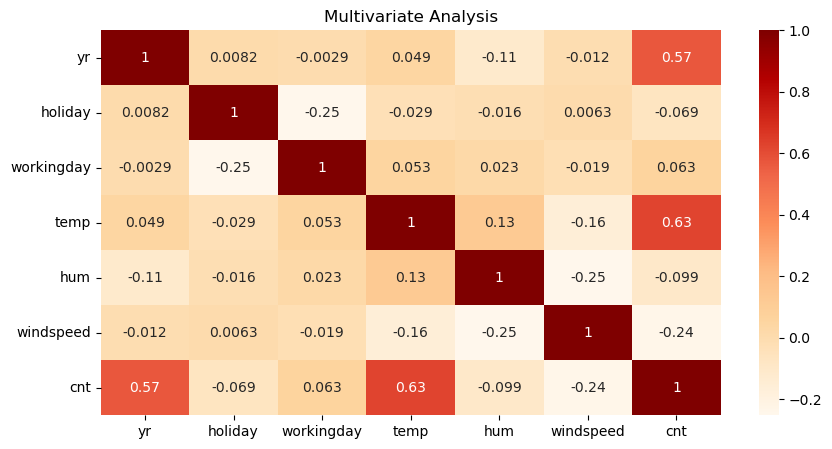

In [23]:
#Multivariate Analysis

plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'OrRd')

plt.title("Multivariate Analysis")
plt.show()



In [24]:
# -- Highest correlation with cnt is seen in temp followed by yr

In [25]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [26]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [27]:
#categorical variables - season, mnth, weekday, and weathersit has more than 2 unique values.
#Dummy variables will be created exclusively for these columns.

In [28]:
data_P = pd.get_dummies(data = data, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '')
data_P.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [29]:
data_P.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'cloudy', 'light snow/rain'],
      dtype='object')

In [30]:
#Model Building and Evaluation
# Getting the feature variables in X and dependent variable `cnt` in y
X = data_P.drop('cnt', axis = 1)
y = data_P['cnt']

In [31]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [32]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
653,1,0,1,19.201653,55.8333,12.208807,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [33]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
# Inspect the training set after scaling
X_train_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
653,0.98254,-0.161569,0.690564,-0.121991,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,-0.325669,...,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.724826,-0.173902
576,0.98254,-0.161569,0.690564,1.232298,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,-0.325669,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.724826,-0.173902
426,0.98254,-0.161569,-1.448092,-0.421405,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,-0.325669,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,1.379641,-0.173902
728,0.98254,-0.161569,-1.448092,-1.296629,-1.045794,2.019569,1.766626,-0.572078,-0.575091,-0.325669,...,-0.306950,-0.295354,-0.421212,-0.427633,2.449490,-0.391789,-0.391789,-0.434019,-0.724826,-0.173902
482,0.98254,-0.161569,-1.448092,-0.628694,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,-0.325669,...,-0.306950,-0.295354,-0.421212,2.338451,-0.408248,-0.391789,-0.391789,-0.434019,1.379641,-0.173902


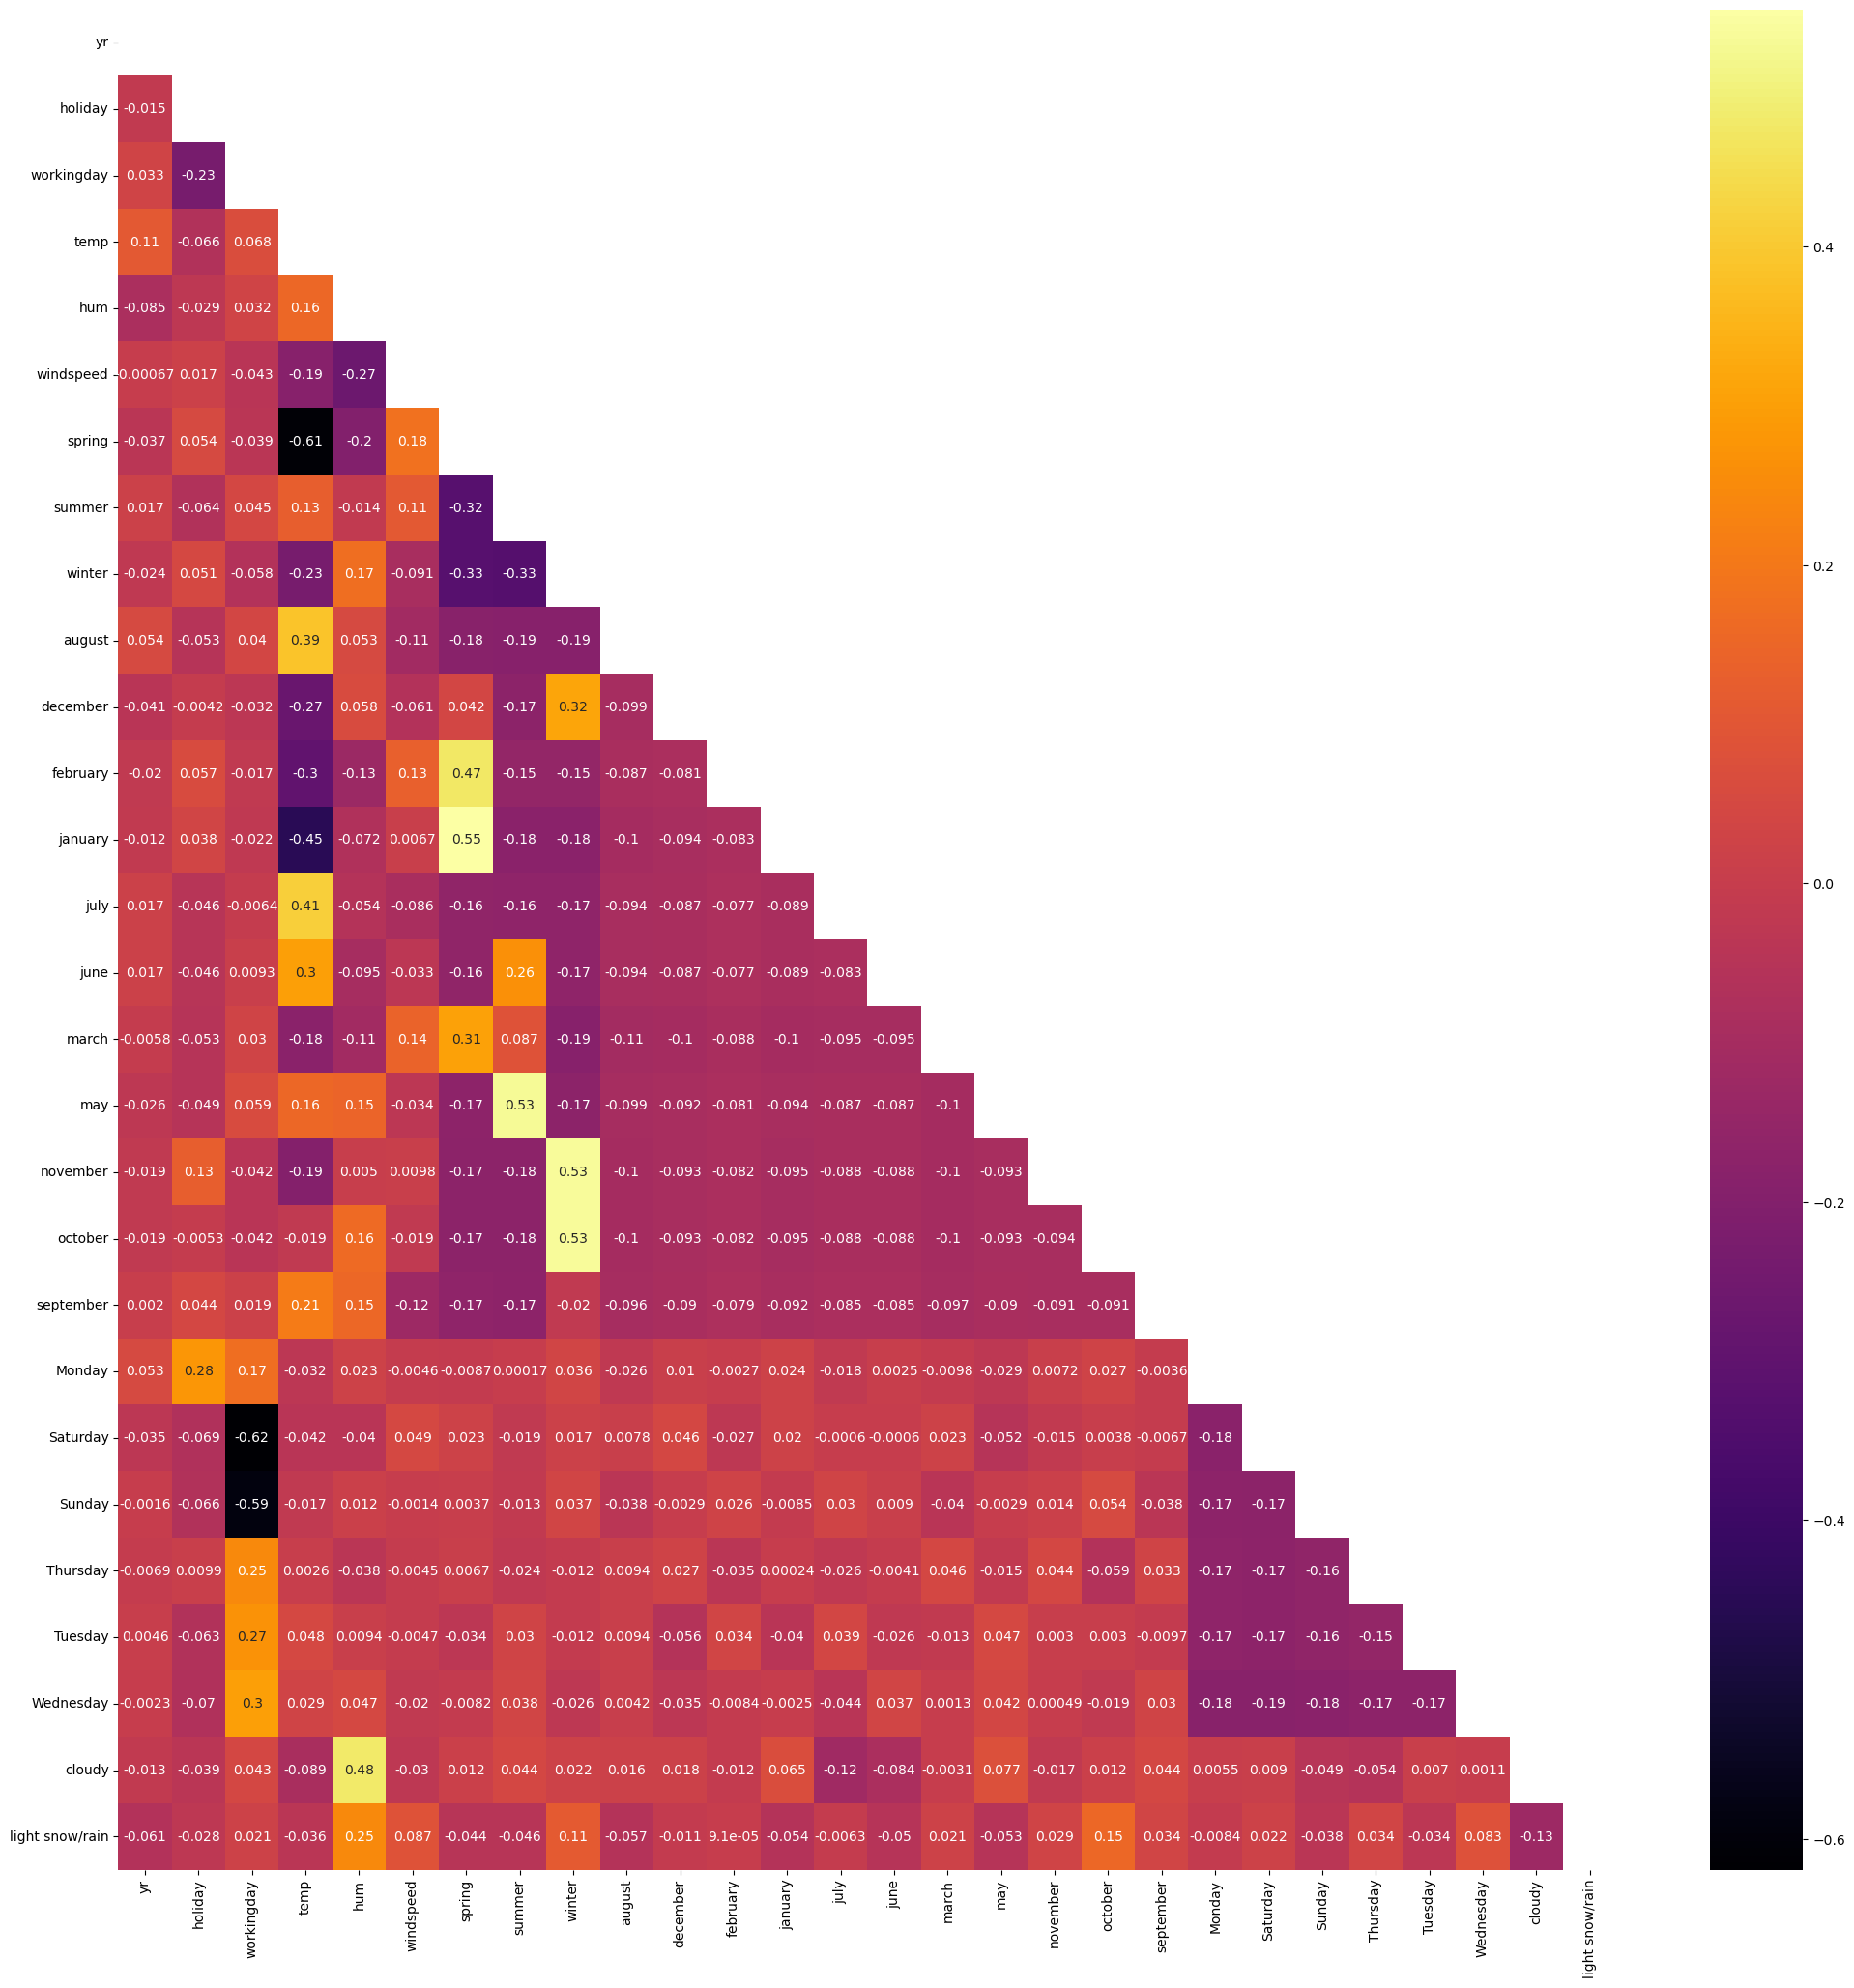

In [34]:
# Inspecting the correlation in the training dataframe
plt.figure(figsize = (25, 25))
matrix = np.triu(X_train_scaled.corr())
sns.heatmap(X_train_scaled.corr(), annot = True, cmap = "inferno", mask = matrix)
plt.show()

In [35]:
# Selecting 15 Features using RFE 

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [36]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
21,1,True,Saturday
19,1,True,september
17,1,True,november
16,1,True,may
14,1,True,june
26,1,True,cloudy
12,1,True,january
11,1,True,february
10,1,True,december


In [37]:
# Selected Features having rank=1
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Saturday', 'september', 'november', 'may', 'june', 'cloudy',
       'january', 'february', 'december', 'july', 'winter', 'august',
       'light snow/rain', 'spring'], dtype=object)

In [38]:
#manual elimination

In [39]:
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [40]:
# Check and select features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
# Ensure features are in X_train
features_1 = [feat for feat in selected_features if feat in X_train.columns]
# Subset the data
X_train_subset = X_train_scaled[features_1]

# Fit the OLS model
ols_model = ols_fit(y_train, X_train_subset)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          6.25e-162
Time:                        13:29:44   Log-Likelihood:                -4185.6
No. Observations:                 511   AIC:                             8403.
Df Residuals:                     495   BIC:                             8471.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     39.243    1

In [41]:
#Model 2 :
#Dropping Saturday because of high p-value

In [51]:
del_feature = 'Saturday'

# Filter out the feature
features_1_filtered = [feat for feat in features_1 if feat != del_feature]

# Subset the data
X_train_subset = X_train_scaled[features_1_filtered]

# Fit the OLS model
final_model=ols_fit(y_train, X_train_subset)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          9.28e-163
Time:                        13:41:39   Log-Likelihood:                -4186.2
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     496   BIC:                             8466.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     39.250    1

In [43]:
#Model 3 :features_1_filtered
#Dropping November and December because corresponding information may contain in winter


In [47]:
vif(X_train_subset)

              index       vif
14           spring  3.760737
11           winter  2.806268
7           january  1.958577
8          february  1.733923
3          november  1.624084
12           august  1.602088
4               may  1.540861
10             july  1.501140
5              june  1.500416
9          december  1.414494
2         september  1.335041
6            cloudy  1.052223
13  light snow/rain  1.051510
1                yr  1.011263
0             const  1.000000


In [ ]:
#VIF < 5 for selected features.


<Figure size 800x500 with 0 Axes>

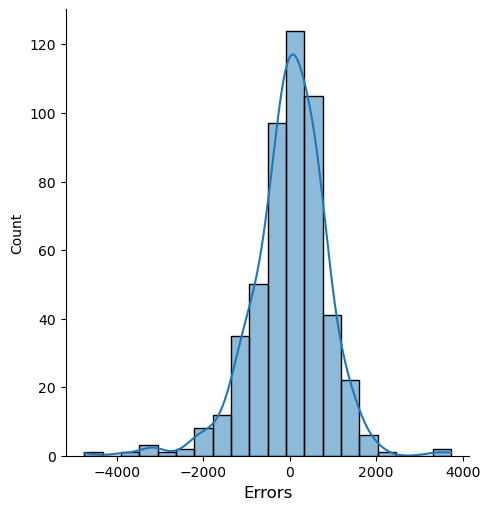

In [79]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train_scaled[features_1_filtered])

y_train_pred = final_model.predict(X_train_sm)

plt.show()
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

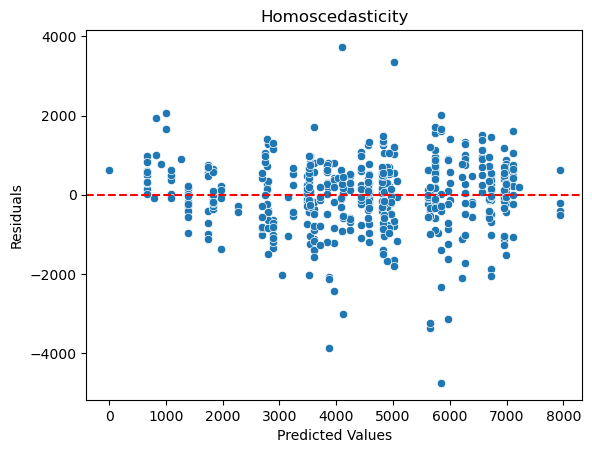

In [81]:
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

In [83]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-4.4495826896914295e-13

In [90]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[features_1_filtered]
X_test_scaled.head()

,yr,september,november,may,june,cloudy,january,february,december,july,winter,august,light snow/rain,spring
184,-1.01777,-0.295354,-0.30695,-0.303118,-0.287449,1.379641,-0.310752,-0.266981,-0.303118,3.478874,-0.575091,-0.325669,-0.173902,-0.566051
535,0.98254,-0.295354,-0.30695,-0.303118,3.478874,-0.724826,-0.310752,-0.266981,-0.303118,-0.287449,-0.575091,-0.325669,-0.173902,-0.566051
299,-1.01777,-0.295354,-0.30695,-0.303118,-0.287449,1.379641,-0.310752,-0.266981,-0.303118,-0.287449,1.738857,-0.325669,-0.173902,-0.566051
221,-1.01777,-0.295354,-0.30695,-0.303118,-0.287449,-0.724826,-0.310752,-0.266981,-0.303118,-0.287449,-0.575091,3.070598,-0.173902,-0.566051
152,-1.01777,-0.295354,-0.30695,-0.303118,3.478874,-0.724826,-0.310752,-0.266981,-0.303118,-0.287449,-0.575091,-0.325669,-0.173902,-0.566051


In [96]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)
# Get the predicted values from the linear model
y_test_pred = final_model.predict(X_test_sm)

In [98]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.8

In [102]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)


843.6714224251263


In [104]:
round(final_model.params, 2)

const              4491.30
yr                 1069.78
september           370.72
november           -257.79
may                 263.97
june                318.96
cloudy             -344.55
january            -367.86
february           -216.54
december           -265.03
july                260.30
winter              357.72
august              365.59
light snow/rain    -454.45
spring             -391.91
dtype: float64

In [ ]:
## bestfit line is determined by the following equation:

#  cnt = 4491.30 + 1069.78 x yr + 370.72 x september -257.79 x november - 263.97 x may 
#      + 318.96 x june -344.55 x Cloudy - 367.86 x january -216.54 x february - 265.03 x december
#  + 260.30 x july + 357.72 x winter + 365.59 x august - 454.45 light snow/rain - 391.91 spring